In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("5G_Service.csv")

In [ ]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,09-03-2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,09-03-2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,09-03-2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,09-03-2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,09-03-2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [ ]:
df.tail()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
395,09-03-2023 10:06,User_396,Streaming,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,09-03-2023 10:06,User_397,Video_Call,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,09-03-2023 10:06,User_398,Video_Streaming,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,09-03-2023 10:06,User_399,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%
399,09-03-2023 10:06,User_400,Web_Browsing,-113 dBm,0 ms,0.1 Mbps,0.1 Mbps,70%


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm', '').astype(float)
df['Latency'] = df['Latency'].str.replace(' ms', '').astype(float)
df['Required_Bandwidth'] = df['Required_Bandwidth'].str.replace(' Mbps', '').str.replace(' Kbps', 'e-3').astype(float)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.replace(' Mbps', '').str.replace(' Kbps', 'e-3').astype(float)
df['Resource_Allocation'] = df['Resource_Allocation'].str.rstrip('%').astype(float) / 100

In [ ]:
df['Resource_Allocation']

0      0.70
1      0.80
2      0.75
3      0.90
4      0.85
       ... 
395    0.85
396    0.75
397    0.70
398    0.70
399    0.70
Name: Resource_Allocation, Length: 400, dtype: float64

In [ ]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

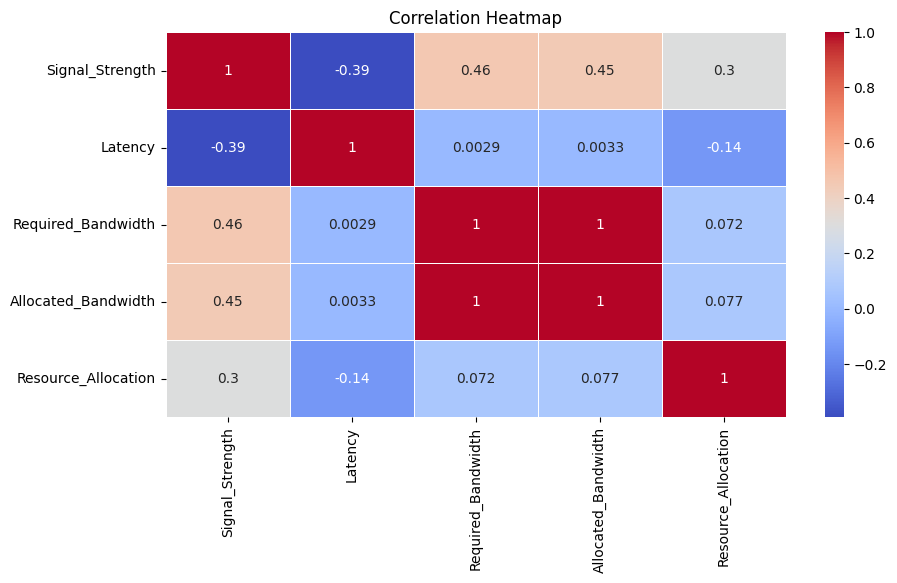

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.4)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear **Regression**

In [ ]:
df['Latency_Signal_Interaction'] = df['Latency'] * df['Signal_Strength']

In [ ]:
X = df[['Latency', 'Latency_Signal_Interaction']]
y = df['Resource_Allocation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse_new_feature = mean_squared_error(y_test, y_pred)
r2_new_feature = r2_score(y_test, y_pred)

print(f'Mean Squared Error with New Feature: {mse_new_feature}')
print(f'R-squared with New Feature: {r2_new_feature}')

Mean Squared Error with New Feature: 0.006822902316122303
R-squared with New Feature: 0.22131737643114047


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_test, mode='markers', name='Actual', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_pred, mode='markers', name='Predicted', marker=dict(color='red')))
fig.update_layout(xaxis_title='Latency', yaxis_title='Resource Allocation', title='Linear Regression', width = 700,height = 500)
fig.show()

# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
degree = 5
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_poly = polyreg.predict(X_test)

In [ ]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression - Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression - R-squared: {r2_poly}')

Polynomial Regression - Mean Squared Error: 0.005233160598816823
Polynomial Regression - R-squared: 0.40275105287454593


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_test, mode='markers', name='Actual', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_pred_poly, mode='markers', name='Predicted', marker=dict(color='red')))
fig.update_layout(xaxis_title='Latency', yaxis_title='Resource Allocation', title='Polynomial Regression', width = 700,height = 500)
fig.show()

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Regression - Mean Squared Error: {mse_dt}')
print(f'Decision Tree Regression - R-squared: {r2_dt}')

Decision Tree Regression - Mean Squared Error: 0.007562500000000002
Decision Tree Regression - R-squared: 0.13690874236547645


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_test, mode='markers', name='Actual', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_pred_dt, mode='markers', name='Predicted', marker=dict(color='red')))
fig.update_layout(xaxis_title='Latency', yaxis_title='Resource Allocation', title='Decision Tree', width = 700,height = 500)
fig.show()

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression - Mean Squared Error: {mse_rf}')
print(f'Random Forest Regression - R-squared: {r2_rf}')

Random Forest Regression - Mean Squared Error: 0.0047986814886188086
Random Forest Regression - R-squared: 0.4523371846612214


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_test, mode='markers', name='Actual', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_pred_rf, mode='markers', name='Predicted', marker=dict(color='red')))
fig.update_layout(xaxis_title='Latency', yaxis_title='Resource Allocation', title='Random Forest', width = 700,height = 500)
fig.show()

# **Gradient Boosting Reggressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting Regression - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting Regression - R-squared: {r2_gb}')

Gradient Boosting Regression - Mean Squared Error: 0.004263375707507661
Gradient Boosting Regression - R-squared: 0.5134304395158662


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_test, mode='markers', name='Actual', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_pred_gb, mode='markers', name='Predicted', marker=dict(color='red')))
fig.update_layout(xaxis_title='Latency', yaxis_title='Resource Allocation', title='Gradient Boosting', width = 700,height = 500)
fig.show()

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Support Vector Machine Regression - Mean Squared Error: {mse_svr}')
print(f'Support Vector Machine Regression - R-squared: {r2_svr}')

Support Vector Machine Regression - Mean Squared Error: 0.007305186967432847
Support Vector Machine Regression - R-squared: 0.1662753048625527


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_test, mode='markers', name='Actual', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_pred_svr, mode='markers', name='Predicted', marker=dict(color='red')))
fig.update_layout(xaxis_title='Latency', yaxis_title='Resource Allocation', title='Support Vector Machine', width = 700,height = 500)
fig.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'k-Nearest Neighbors Regression - Mean Squared Error: {mse_knn}')
print(f'k-Nearest Neighbors Regression - R-squared: {r2_knn}')

k-Nearest Neighbors Regression - Mean Squared Error: 0.005953750000000001
k-Nearest Neighbors Regression - R-squared: 0.32051179171682076


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_test, mode='markers', name='Actual', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=X_test['Latency'], y=y_pred_knn, mode='markers', name='Predicted', marker=dict(color='red')))
fig.update_layout(xaxis_title='Latency', yaxis_title='Resource Allocation', title='KNN', width = 700,height = 500)
fig.show()